# Trabalho Grafos 01

# instalação de  bibliotecas com pip

In [ ]:
%pip install spotipy
%pip install networkx
%pip install matplotlib
%pip install scipy

# biblioteca Spotyfy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import networkx as nx
import matplotlib.pyplot as plt

# Configurar as credenciais da API do Spotify
CLIENT_ID = 'f216308e304c4ba3be3fb4ce0f23ceb9'
CLIENT_SECRET = '33c84036de384fcc914b82a173cea2dc'

# Configurar a autenticação OAuth do Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri="http://localhost:8888/callback"))


# Busca Grafo no Spotyfy

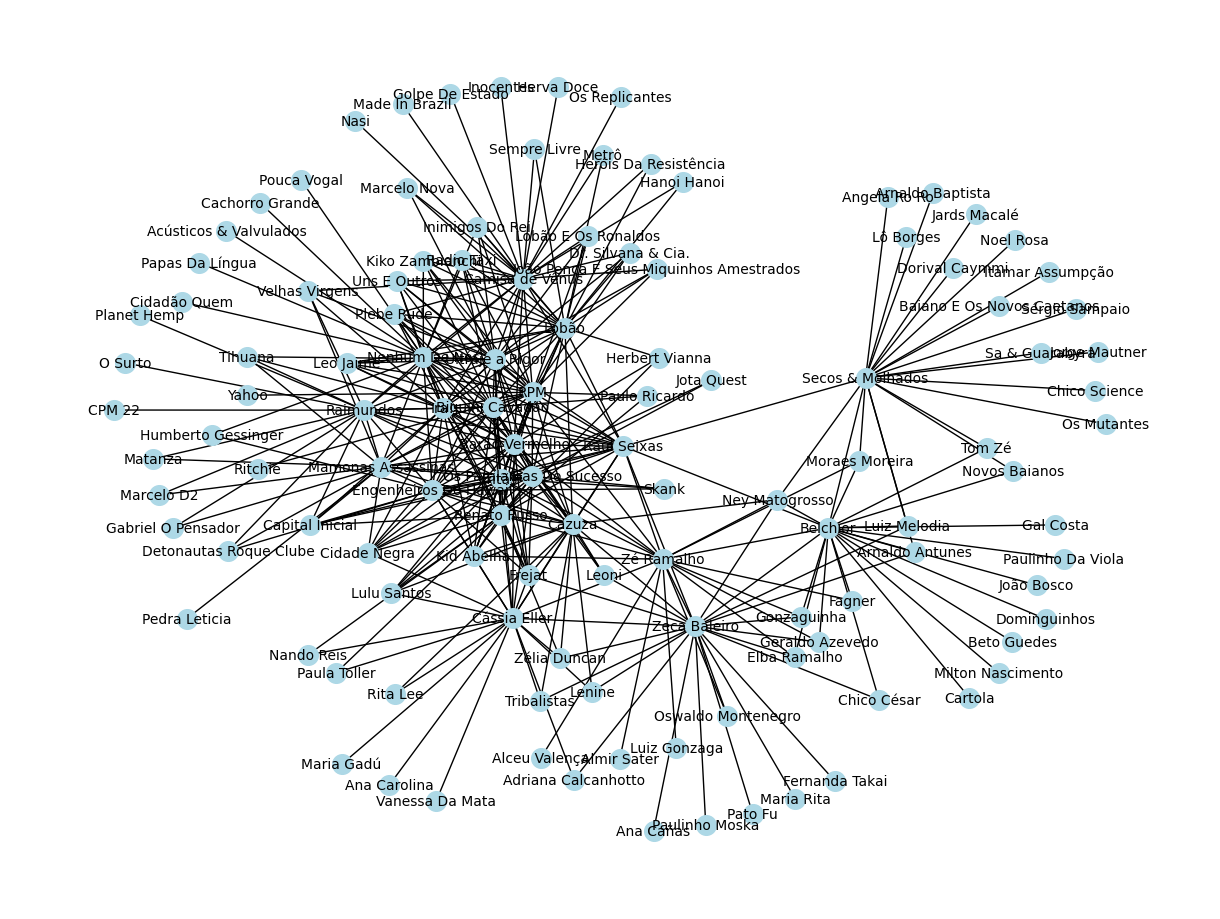

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import networkx as nx
import matplotlib.pyplot as plt

# Configurar as credenciais da API do Spotify
CLIENT_ID = 'f216308e304c4ba3be3fb4ce0f23ceb9'
CLIENT_SECRET = '33c84036de384fcc914b82a173cea2dc'

# Configurar a autenticação OAuth do Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri="http://localhost:8888/callback"))

# Função para criar um grafo de artistas relacionados
def criar_grafo_artistas_relacionados(artist_name, depth=1):
    # Inicializa um grafo vazio
    G = nx.Graph()
    # Conjunto para rastrear artistas já visitados
    artistas_visitados = set()
    
    #Esta é a função principal que realiza a busca em largura no grafo de artistas relacionados.
    def buscar_artistas_relacionados(artist_name, depth):

        # Condição de parada quando a profundidade (depth) atinge 0 ou menos, a busca é encerrada. Isso limita o número de níveis da busca.
        if depth <= 0:
            return
        
        # Verifica se o artista atual já foi visitado para evitar visitas duplicadas.
        if artist_name not in artistas_visitados:
            
            #Adiciona o artista atual à lista de artistas visitados.
            artistas_visitados.add(artist_name)
            
            # Pesquisa por informações do artista no Spotify
            artist_info = sp.search(q=f'artist:{artist_name}', type='artist', limit=1)['artists']['items'][0]
            artist_id = artist_info['id']
            
            # Obtém artistas relacionados
            related_artists = sp.artist_related_artists(artist_id)

            # Itera sobre os artistas relacionados encontrados.
            for related_artist in related_artists['artists']:
                related_artist_name = related_artist['name']
                # Adiciona uma aresta entre o artista atual e os relacionados
                G.add_edge(artist_name, related_artist_name)
                # Chama recursivamente a função para artistas relacionados
                buscar_artistas_relacionados(related_artist_name, depth - 1)
    
    # Inicializa a busca com o artista inicial
    buscar_artistas_relacionados(artist_name, depth)
    return G

# Função para plotar o grafo de forma expandida
def plotar_grafo_expandido(grafo):
    # Define o tamanho da figura (largura x altura) conforme necessário
    plt.figure(figsize=(12, 9))
    
    # Layout do grafo (usando o Kamada-Kawai para uma visualização melhor)
    pos = nx.kamada_kawai_layout(grafo)
    
    # Desenha o grafo com rótulos, tamanho de nó maior e cores personalizadas
    nx.draw(grafo, pos, with_labels=True, node_size=200, node_color='lightblue', font_size=10, font_color='black')
    
    # Aumenta o tamanho da fonte dos rótulos dos nós para torná-los mais legíveis
    labels = nx.get_node_attributes(grafo, 'label')
    nx.draw_networkx_labels(grafo, pos, labels, font_size=12)
    
    # Exibe o gráfico sem eixos
    plt.axis('off')
    plt.show()

# Exemplo de uso  altere o nome do artista para o que desejar
artista_inicial = 'Raul Seixas'
# Cria o grafo de artistas relacionados com profundidade 2
grafo_artistas = criar_grafo_artistas_relacionados(artista_inicial, depth=2)
# Plota o grafo de forma expandida
plotar_grafo_expandido(grafo_artistas)


# salvar Grafo em Json

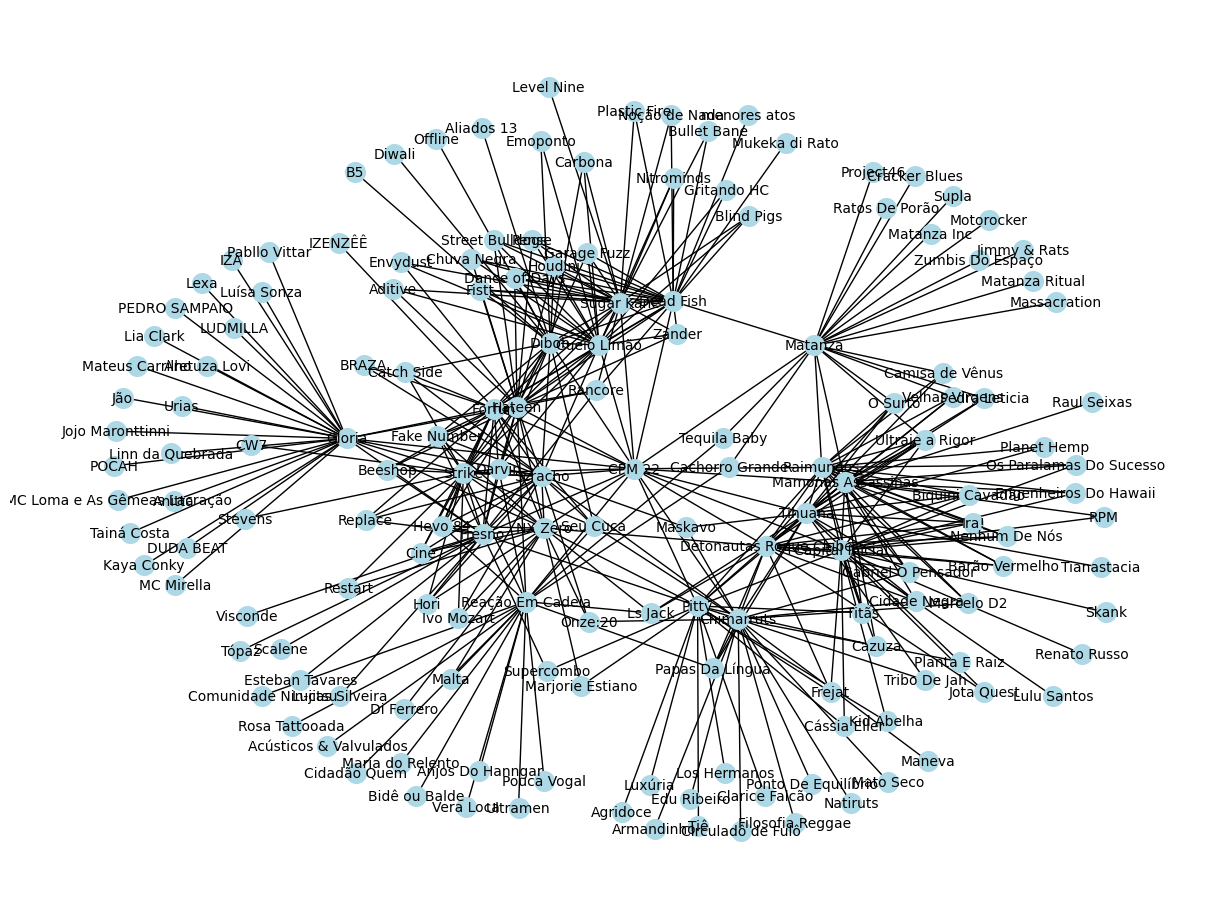

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# ... Configuração de credenciais e autenticação do Spotify ...

# Configurar as credenciais da API do Spotify
CLIENT_ID = 'f216308e304c4ba3be3fb4ce0f23ceb9'
CLIENT_SECRET = '33c84036de384fcc914b82a173cea2dc'

# Configurar a autenticação OAuth do Spotify
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, redirect_uri="http://localhost:8888/callback"))

# Função para criar um grafo de artistas relacionados
# Função para criar um grafo de artistas relacionados
def criar_grafo_artistas_relacionados(artist_name, depth=1):
    # Inicializa um grafo vazio
    G = nx.Graph()
    # Conjunto para rastrear artistas já visitados
    artistas_visitados = set()

    # Esta é a função principal que realiza a busca em largura no grafo de artistas relacionados.
    def buscar_artistas_relacionados(artist_name, depth):

        # Condição de parada quando a profundidade (depth) atinge 0 ou menos, a busca é encerrada. Isso limita o número de níveis da busca.
        if depth <= 0:
            return

        # Verifica se o artista atual já foi visitado para evitar visitas duplicadas.
        if artist_name not in artistas_visitados:

            # Adiciona o artista atual à lista de artistas visitados.
            artistas_visitados.add(artist_name)

            # Pesquisa por informações do artista no Spotify
            artist_info = sp.search(q=f'artist:{artist_name}', type='artist', limit=1)['artists']['items'][0]
            artist_id = artist_info['id']

            # Obtém artistas relacionados
            related_artists = sp.artist_related_artists(artist_id)

            # Itera sobre os artistas relacionados encontrados.
            for related_artist in related_artists['artists']:
                related_artist_name = related_artist['name']
                # Adiciona uma aresta entre o artista atual e os relacionados
                G.add_edge(artist_name, related_artist_name)
                # Chama recursivamente a função para artistas relacionados
                buscar_artistas_relacionados(related_artist_name, depth - 1)

    # Inicializa a busca com o artista inicial
    buscar_artistas_relacionados(artist_name, depth)
    return G

# Função para salvar o grafo em formato JSON
def salvar_grafo_para_json(grafo, nome_arquivo):
    data = nx.node_link_data(grafo)
    with open(nome_arquivo, 'w') as arquivo_json:
        json.dump(data, arquivo_json, indent=4)

# Exemplo de uso
artista_inicial = 'CPM 22'
# Cria o grafo de artistas relacionados com profundidade 2
grafo_artistas = criar_grafo_artistas_relacionados(artista_inicial, depth=2)
# Salva o grafo em um arquivo JSON
nome_arquivo_json = 'grafo_DFS_'+ artista_inicial.replace( " ", "_")+'.json'
salvar_grafo_para_json(grafo_artistas, nome_arquivo_json)

# Plota o grafo de forma expandida
plotar_grafo_expandido(grafo_artistas)
